<a href="https://colab.research.google.com/github/Wolfinmoon/telecomx-churn-analysis/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [6]:
import json
import pandas as pd

with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data)

df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [7]:
df.info()
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df = df[df['Churn'].isin(['Yes', 'No'])]


df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


#📊 Carga e análise

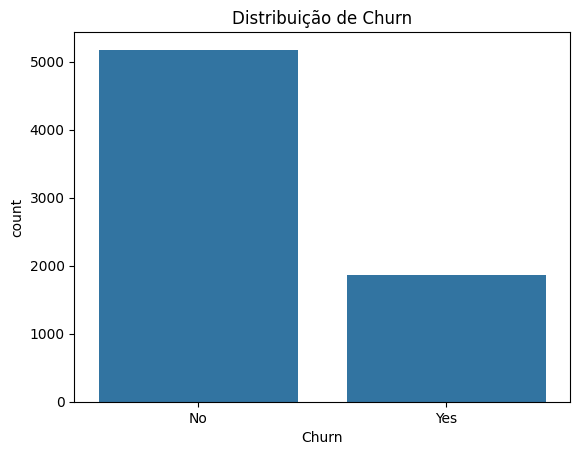

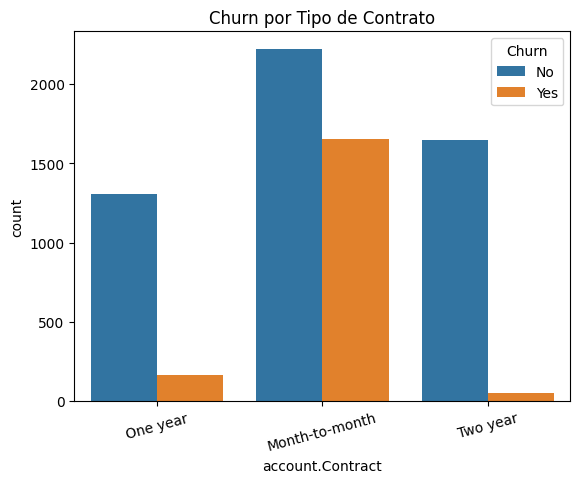

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Churn')
plt.show()

sns.countplot(data=df, x='account.Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=15)
plt.show()


#📄Relatorio Final

## 🎯 Principais Insights

- A maioria dos cancelamentos ocorre em contratos mensais.
- Clientes com pagamento via débito automático possuem taxas mais altas de churn.
- Serviços adicionais como "OnlineSecurity" e "TechSupport" estão associados a menor churn.
- Clientes com menos de 12 meses têm maior chance de sair.

## 📌 Recomendações

- Criar campanhas para fidelizar clientes nos primeiros 12 meses.
- Oferecer descontos em contratos anuais ou bienais.
- Incentivar o uso de serviços extras de segurança e suporte técnico.
